### Grid Plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('input/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
tmp = pd.melt(data, id_vars=['Survived', 'Pclass', 'Embarked', 'Sex'], value_vars=['Fare'])
tmp.head()

,Survived,Pclass,Embarked,Sex,variable,value
0,0,3,S,male,Fare,7.2500
1,1,1,C,female,Fare,71.2833
2,1,3,S,female,Fare,7.9250
3,1,1,S,female,Fare,53.1000
4,0,3,S,male,Fare,8.0500


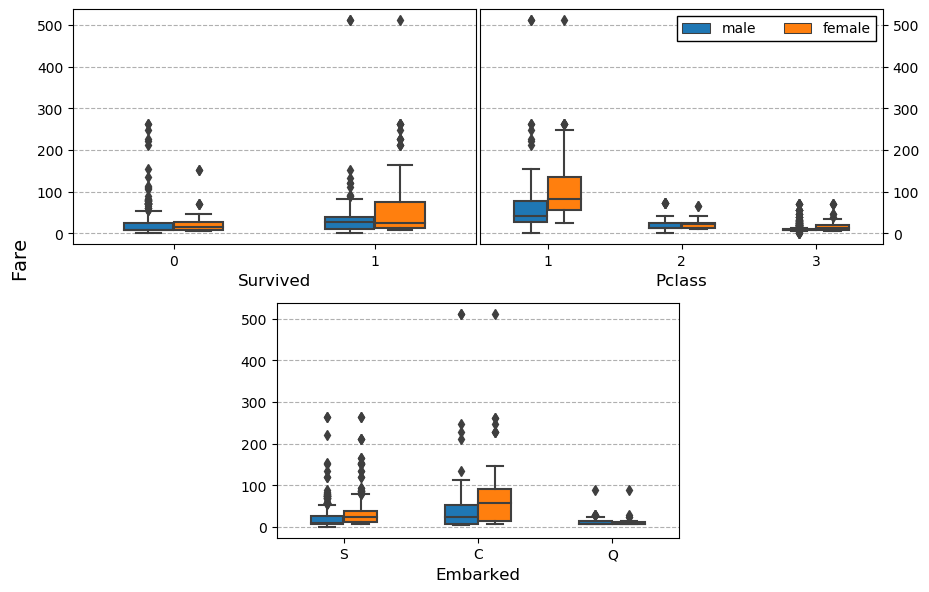

In [4]:
fig = plt.figure(constrained_layout=False, figsize=(9,7), dpi=100)
gs = fig.add_gridspec(nrows=2, ncols=8, left=0.05, right=0.95, wspace=0.05)
ax1 = fig.add_subplot(gs[0, :4])
ax2 = fig.add_subplot(gs[0, 4:8])
ax3 = fig.add_subplot(gs[1, 2:6])

sns.boxplot(x='Survived', y='value', hue='Sex', width=0.5, saturation=1, data=tmp, ax=ax1)
sns.boxplot(x='Pclass', y='value', hue='Sex', width=0.5, saturation=1, data=tmp, ax=ax2)
sns.boxplot(x='Embarked', y='value', hue='Sex', width=0.5, saturation=1, data=tmp, ax=ax3)

ax1.legend().set_visible(False)
ax2.legend(loc='upper right', frameon=True, ncol=2, framealpha=1, shadow=False, fancybox=False, edgecolor='black')
ax3.legend().set_visible(False)

ax2.yaxis.set_ticks_position('right')

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')

ax1.grid(axis='y', linestyle='--')
ax2.grid(axis='y', linestyle='--')
ax3.grid(axis='y', linestyle='--')

# Backward grid line
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
ax3.set_axisbelow(True)

ax1.set_xlabel('Survived', fontsize=12)
ax2.set_xlabel('Pclass', fontsize=12)
ax3.set_xlabel('Embarked', fontsize=12)

ax2.tick_params(axis='y', left=False)

fig.text(-0.02, 0.5, 'Fare', rotation='vertical', fontsize=14)
fig.subplots_adjust(hspace=0.25)
plt.show()
# fig.savefig('../figures/grid_plot.png', bbox_inches='tight', dpi=300)